## Scenario:


You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions:
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Round 1

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.
Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Split the data into a training set and a test set.
Scale the features either by using normalizer or a standard scaler.
Fit a logistic Regression model on the training data.
Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.
Round 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.
Round 4

fit a Random forest Classifier on the data and compare the accuracy.
tune the hyper paramters with gridsearch and check the results.
Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
#Importing our defined functions to clean
from clean_data_functions import *

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
churnData= pd.read_csv("DATA_Customer-Churn.csv")
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:


churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

data_frame_overview(churnData)

Column names: 
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dimensions: (7043, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,Yes,Yes,No,No,No,No,One year,56.15,3487.95,No


In [4]:
null_check(churnData)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Length: 7043, dtype: int64

Total null values per column: 
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



In [5]:
churnData['TotalCharges'].fillna(churnData['TotalCharges'].mean(), inplace=True)

In [6]:
null_check(churnData)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Length: 7043, dtype: int64

Total null values per column: 
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



In [7]:
churn = churnData['Churn'].replace({'Yes': 1, 'No': 0})

churnData = churnData[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

churnData['default'] = churnData['Churn'].replace({'Yes': 1, 'No': 0})
churnData


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,default
0,0,1,29.85,29.85,No,0
1,0,34,56.95,1889.50,No,0
2,0,2,53.85,108.15,Yes,1
3,0,45,42.30,1840.75,No,0
4,0,2,70.70,151.65,Yes,1
...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,0
7039,0,72,103.20,7362.90,No,0
7040,0,11,29.60,346.45,No,0
7041,1,4,74.40,306.60,Yes,1


In [8]:
churnData.drop(columns =['Churn'], inplace = True
            )

churnData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,default
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [40]:
## Data splitting

X = churnData.drop(columns=['default'])
y = churnData[['default']]
print(X.shape)
print(y.shape)

# If 'y' is categorical and you want to see the unique classes
unique_classes = np.unique(y)
print(unique_classes)

(7043, 4)
(7043, 1)
[0 1]


In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [19]:
X_train.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253,2291.140665
std,0.367388,24.424539,30.089324,2261.141833
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,412.212500
50%,0.000000,29.000000,70.525000,1412.825000
75%,0.000000,55.000000,89.937500,3806.612500
max,1.000000,72.000000,118.600000,8684.800000


In [43]:
scaler= StandardScaler()
scfit = scaler.fit(X_train)
X_train_log= scfit.transform(X_train)
X_test_log= scfit.transform(X_test)


In [32]:
#y_train_scaled =scfit.fit_transform(y_train)
#y_train_scaled

In [33]:
#y_test_scaled = scfit.transform(y_train)
#y_test_scaled

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [45]:
#Fit a logistic Regression model on the training data.
log_model = LogisticRegression() 

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

/Users/miriamg/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


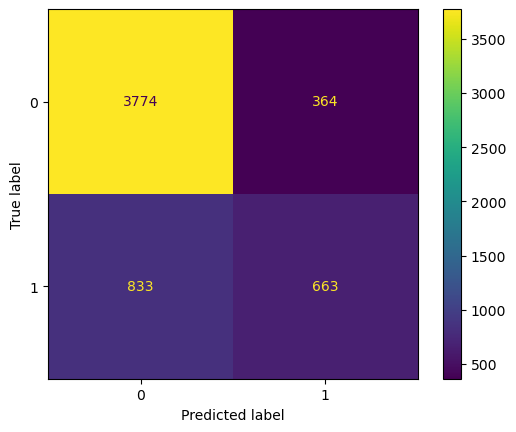

In [46]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [47]:
#Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

/Users/miriamg/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/miriamg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/miriamg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.828541,0.782825
1,Precision,0.736607,0.615120
2,Recall,0.551471,0.479893


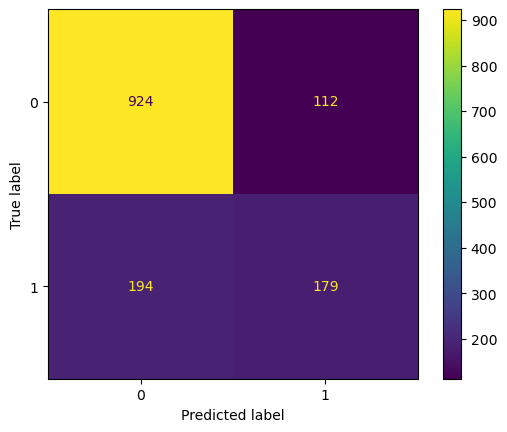

In [48]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()